## **Please make your own copy of this notebook before making changes or beginning the exercises!**

# What is a 'Random Walk'?

A **random walk** is a mathematical concept used to describe a path that consists of a succession of random steps.

Imagine you are standing on a straight line (like a number line), and at each step, you flip a coin to decide whether to move one step to the right or one step to the left. Over time, you create a path that looks random because each step depends on a random event.

# 'Random Walk' in Physics:

Our usual modeling methods based on identifying position,
velocity, and/or forces on an object, then calculating motion
using Newton's law is too messy and (literally) chaotic for a small particle
being hit frequently by many different molecules.

An alternative starting point is to describe the result of all the
forces acting on the particle as ***random motion***.

Now let us try to design our own 1-dimensional random walk where we will toss a coin for each time the particle has to move left or right.

Import the needed Python modules and give them simple names:

In [ ]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb
from IPython.display import display, Math, Latex
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

**All the important functions**

Below are the definitions of several functions we will use to model the random walk. You do not need to understand all of the details in each definition... just run the cell for now so we can *use* the functions later

In [ ]:
def binomial_random_walk(steps, iterations):
    """
    Generate a binomial random walk.

    This function simulates a 1D binomial random walk for a specified number of
    steps and iterations. At each step, the walker moves either -1 or +1 with
    equal probability, and this is repeated for the given number of iterations.

    The resulting walk is stored in a (steps+1, iterations) array, where each
    column represents a separate walk over time.

    Parameters:
    steps (int): The number of steps in the random walk.
    iterations (int): The number of independent random walks to simulate.

    Returns:
    numpy.ndarray: A (steps+1, iterations) array where each column represents
    the position of the walker at each step for a given iteration.
    """
    # Create a (steps+1, iterations) array to store the walk (steps first, iterations second)
    walks = np.zeros((steps+1, iterations))

    # Generate the walks
    for j in range(iterations):
        for i in range(1, steps+1):  # Start from step 1 to steps
            move = np.random.choice([-1, 1])  # Random move: -1 or 1
            walks[i, j] = walks[i-1, j] + move  # Update position based on previous step

    return walks




def plot_binomial_walks(walks, pt_size):
    """
    Plot the position of the particle over time for a binomial random walk.

    This function visualizes the positions of the particle during a binomial random
    walk over time. If multiple iterations (walks) are provided in a 2D array, it
    plots each walk as a separate line. The x-axis represents the number of steps,
    and the y-axis represents the position of the particle. The marker size for the
    plot points can be adjusted using `pt_size`.

    Parameters:
    walks (numpy.ndarray): A 1D or 2D array representing the particle positions.
                           If 2D, each column is an independent random walk.
    pt_size (int or float): The size of the markers in the plot.

    Returns:
    None: The function generates a plot of the particle's position over time.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting the random walks
    if walks.ndim == 2:  # If walks is a 2D array
        for i in range(np.shape(walks)[1]):  # Iterate over iterations (second axis)
            ax.plot(walks[:, i], '--o', markersize=pt_size, alpha=0.7)
    else:
        ax.plot(walks[:], '--o', markersize=pt_size, alpha=0.7)

    ax.set_title('Binomial Random Walk - Position Over Time', fontsize=16, fontweight='bold')
    ax.set_xlabel('Steps', fontsize=14, fontweight='bold')
    ax.set_ylabel('Position', fontsize=14, fontweight='bold')

    # Adjust x-ticks to distribute evenly based on the number of steps
    steps = np.shape(walks)[0] - 1
    tick_step_size = math.ceil(steps / 11)
    ax.set_xticks(np.arange(0, tick_step_size * 12, tick_step_size))
    plt.setp(ax.get_xticklabels(), fontsize=12, fontweight='bold')
    plt.setp(ax.get_yticklabels(), fontsize=12, fontweight='bold')

    plt.show()




def binomial_coefficient(n, k):
    """
    Calculate the binomial coefficient "n choose k".

    This function computes the binomial coefficient, which is the number of ways
    to choose `k` elements from a set of `n` elements without regard to the order.
    The formula used is:

    C(n, k) = n! / (k! * (n - k)!)

    If `k` is less than 0 or greater than `n`, the function returns 0 as there
    are no valid combinations in such cases.

    Parameters:
    n (int): The total number of elements.
    k (int): The number of elements to choose from `n`.

    Returns:
    int: The binomial coefficient value (C(n, k)). If `k` is invalid, returns 0.
    """
    if k < 0 or k > n:
        return 0
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))




def microstates_for_macrostates(steps):
    """
    Calculate the number of microstates for each macrostate in a 1D random walk.

    This function computes the possible macrostates (positions) and calculates the number
    of microstates (paths) that lead to each macrostate after `steps` steps. The number of
    microstates for a given macrostate is determined using the binomial coefficient, provided
    that the position is a valid macrostate (i.e., r = (steps + x) / 2 is an integer).

    Parameters:
    steps (int): The number of steps in the random walk.

    Returns:
    macrostates (numpy.ndarray): Array of possible positions (macrostates) after `steps` steps.
    microstates (numpy.ndarray): Array of the number of microstates corresponding to each macrostate.
    """
    macrostates = np.arange(-steps, steps + 1, 2)  # Possible positions after `steps` (only even steps are possible)
    microstates = np.zeros(len(macrostates))  # Array to store the number of microstates for each macrostate

    # Calculate the number of microstates for each macrostate
    for i, x in enumerate(macrostates):
        # r = (n + x) / 2 must be an integer, otherwise it's not a valid state
        r = (steps + x) // 2
        if (steps + x) % 2 == 0:
            microstates[i] = binomial_coefficient(steps, r)  # Calculate the number of microstates for this macrostate
        else:
            microstates[i] = 0  # If r is not an integer, no valid microstates exist
    return macrostates, microstates




def update_plot(steps, max_steps):
    """
    Update the bar plot based on the number of steps.

    Parameters:
    steps (int): Number of steps in the random walk simulation.
    max_steps (int): Maximum number of macrostates (in one direction) we want to plot
    """
    macrostates, microstates = microstates_for_macrostates(steps)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(macrostates, microstates, color='blue', alpha=0.7)
    plt.xlabel('Macrostate (Position)', fontsize=14)
    plt.ylabel('Number of Microstates', fontsize=14)
    plt.title(f'Number of Microstates for Each Macrostate (Steps = {steps})', fontsize=16)

    # Set a fixed x-limit based on a maximum possible number of steps
    plt.xlim([-max_steps, max_steps])
    plt.show()




def probabilities_for_macrostates(steps):
    """
    Calculate the probabilities of reaching each macrostate after a given number of steps
    in a 1D random walk.

    This function computes the possible macrostates (positions) and the corresponding
    probabilities based on the number of microstates (paths) leading to each macrostate
    after `steps` number of steps. The probabilities are normalized by the total number of microstates,
    which is 2^steps for a binomial random walk.

    Parameters:
    steps (int): The number of steps in the random walk.

    Returns:
    macrostates (numpy.ndarray): Array of possible positions (macrostates) after `steps` steps.
    probabilities (numpy.ndarray): Array of probabilities for each macrostate.
    """
    macrostates = np.arange(-steps, steps + 1, 2)  # Possible positions after `steps`
    microstates = np.zeros(len(macrostates))  # Array to store the number of microstates for each macrostate

    # Calculate the number of microstates for each macrostate
    for i, x in enumerate(macrostates):
        r = (steps + x) // 2
        if (steps + x) % 2 == 0:
            microstates[i] = binomial_coefficient(steps, r)  # Calculate number of microstates
        else:
            microstates[i] = 0  # If r is not an integer, no valid microstates exist

    total_microstates = 2**steps  # Total number of possible microstates is 2^n
    probabilities = microstates / total_microstates  # Normalize to get probabilities
    return macrostates, probabilities




def update_plot_prob(steps, max_steps):
    """
    Update the bar plot to display the probability distribution of macrostates
    after a given number of steps in a 1D random walk.

    This function plots the probabilities of reaching each macrostate (position)
    after `steps` steps. The x-axis is limited to `[-max_steps, max_steps]`, and the
    y-axis is restricted to [0, 1], representing the range of probabilities.

    Parameters:
    steps (int): The number of steps in the random walk.
    max_steps (int): Maximum number of macrostates (in one direction) for setting the x-axis limit.

    Returns:
    None: The function generates a plot and does not return any values.
    """
    macrostates, probabilities = probabilities_for_macrostates(steps)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.bar(macrostates, probabilities, color='blue', alpha=0.7)
    plt.xlabel('Macrostate (Position)', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.title(f'Probability of Each Macrostate (Steps = {steps})', fontsize=16)

    # Set a fixed x-limit based on a maximum possible number of steps
    plt.xlim([-max_steps, max_steps])
    plt.ylim([0, 1])  # Probability range is always between 0 and 1
    plt.show()



def calculate_entropy(probabilities):
    """
    Calculate the entropy of a probability distribution.

    This function computes the entropy of a set of probabilities using the Shannon
    entropy formula. It first removes any zero probabilities to avoid issues with
    the log function (since log(0) is undefined), and then applies the formula:

    S = -sum(P(x) * log2(P(x)))

    where P(x) is the probability of each event (macrostate).

    Parameters:
    probabilities (numpy.ndarray): Array of probabilities for each macrostate.

    Returns:
    entropy (float): The calculated entropy of the probability distribution, in bits.
    """
    # Remove any zero probabilities to avoid log(0) issues
    non_zero_probs = probabilities[probabilities > 0]
    # Entropy formula: S = -sum(P(x) * log(P(x)))
    entropy = -np.sum(non_zero_probs * np.log2(non_zero_probs))
    return entropy



def plot_entropy_vs_steps(max_steps):
    """
    Calculate and plot entropy as a function of the number of steps in a 1D random walk.

    This function calculates the entropy of the probability distribution for each number
    of steps from 1 to `max_steps`. It uses the calculated probabilities at each step to
    determine the entropy and then plots the resulting entropy values as a function of the
    number of steps.

    Parameters:
    max_steps (int): The maximum number of steps for which entropy will be calculated.

    Returns:
    None: The function generates a plot of entropy versus steps.
    """
    entropy_values = []
    step_range = np.arange(1, max_steps + 1)

    for step in step_range:
        [macro, probs] = probabilities_for_macrostates(step)  # Only use the probabilities
        entropy_values.append(calculate_entropy(probs))

    # Plot entropy as a function of steps
    plt.figure(figsize=(8, 6))
    plt.plot(step_range, entropy_values, '-o', color='green', markersize=5)
    plt.xlabel('Steps', fontsize=14)
    plt.ylabel('Entropy (bits)', fontsize=14)
    plt.title('Entropy as a Function of Steps', fontsize=16)
    plt.xlim([1, max_steps])
    plt.ylim([0, max(entropy_values) + 0.1])  # Set y-limit based on the maximum entropy
    plt.show()


# 1-D Random Walk Generator:
## The particle can move only left or right with equal probabilities.


### Let's see the results for a single particle moving once.
Notice the binomial_random_walk function call uses numbers for steps and iterations determined in the previous lines; this is good practice, rather than "hard-coding" the values in the function call, so that these numbers can be changed easily in the future by editing just once in the variable definition but still used over in multiple locations

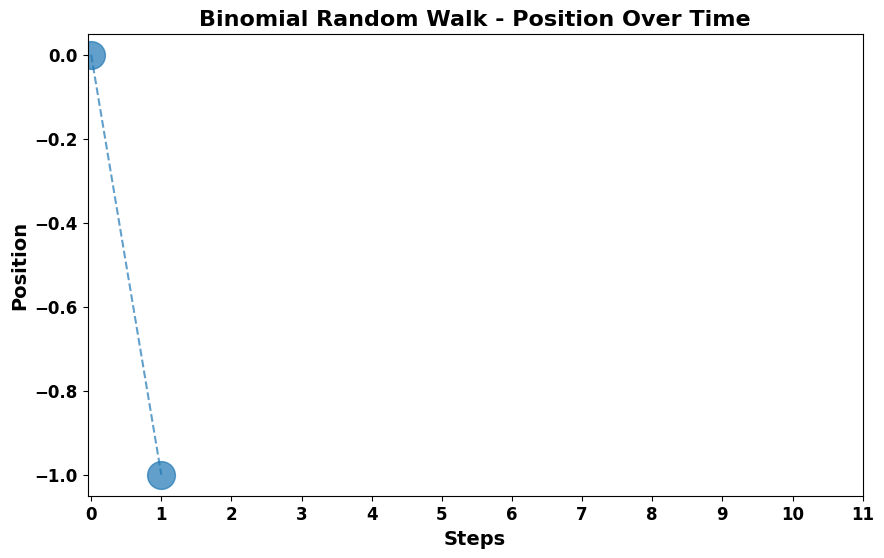

In [ ]:
steps = 1  # Number of steps in the random walk
iterations = 1  # Number of walks

first_step = np.array(binomial_random_walk(steps, iterations))

plot_binomial_walks(first_step , pt_size=20)
# pt_size (int or float): The size of the markers in the plot.

### Let's make it move once more aka 2 steps.

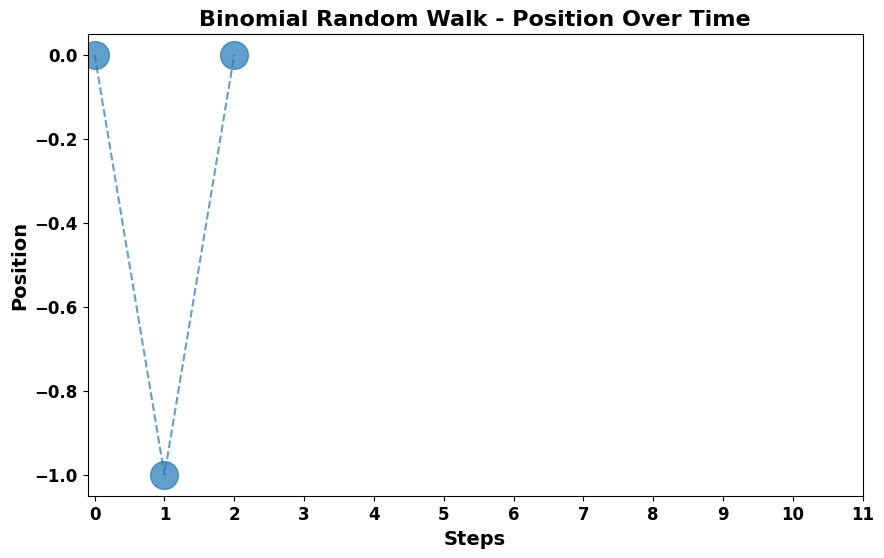

In [ ]:
steps = 1  # Number of steps in the random walk
iterations = 1  # Number of walks

second_step_try = binomial_random_walk(steps, iterations)
second_step = first_step[-1] + second_step_try
two_steps = np.append(first_step,second_step[-1])

plot_binomial_walks(two_steps, pt_size=20)
# pt_size (int or float): The size of the markers in the plot.

### We will keep on observing it for 18 more steps.
*Do we observe the particle moving away from 0?*

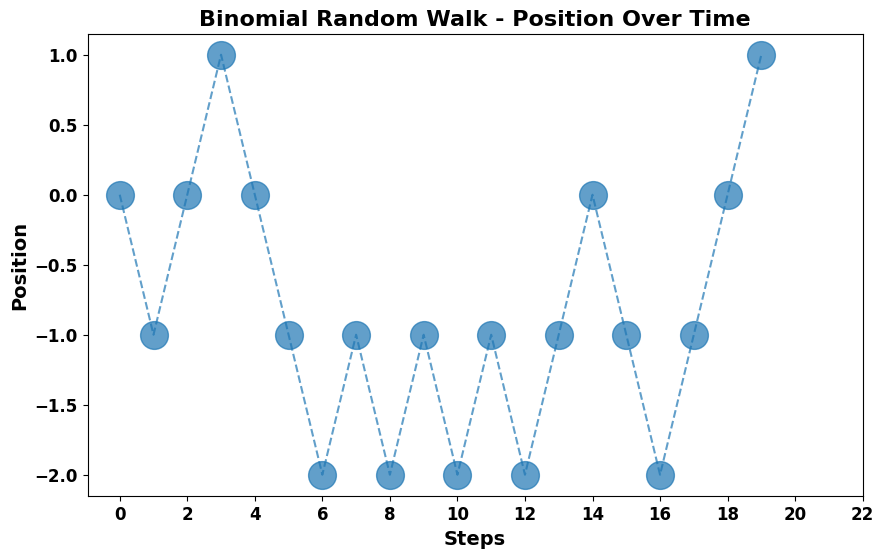

In [ ]:
steps = 18  # Number of steps in the random walk   (since we have already taken 2 steps)
iterations = 1  # Number of walks

more_steps_try = binomial_random_walk(steps, iterations)
more_steps  = second_step[-1] + more_steps_try
twenty_steps = np.append(two_steps,more_steps[1:-1])

plot_binomial_walks(twenty_steps, pt_size=20)
# pt_size (int or float): The size of the markers in the plot.

### Now we will observe it for total 100 steps (longer timescale).

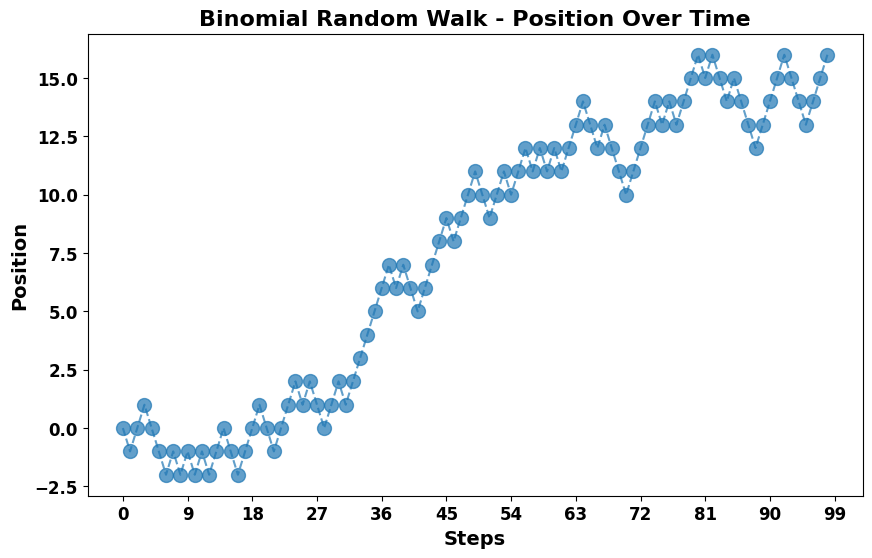

In [ ]:
steps = 80  # Number of steps in the random walk  (since we have already taken 2 + 18 = 20 steps)
iterations = 1  # Number of walks

some_more_steps_try = binomial_random_walk(steps, iterations)
some_more_steps  = twenty_steps[-1] + some_more_steps_try
hundred_steps = np.append(twenty_steps,some_more_steps[1:-1])

plot_binomial_walks(hundred_steps, pt_size=10)
# pt_size (int or float): The size of the markers in the plot.

### Finally 500 steps!

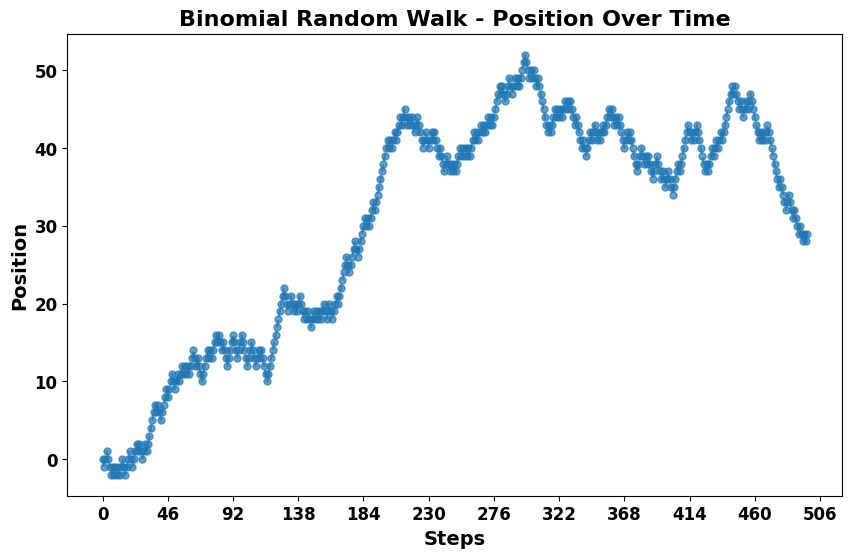

In [ ]:
steps = 400  # Number of steps in the random walk  (since we have already taken 2+18+80 = 100 steps)
iterations = 1  # Number of walks

a_lot_of_steps_try = binomial_random_walk(steps, iterations)
a_lot_of_steps = hundred_steps[-1] + a_lot_of_steps_try
five_hundred_steps = np.append(hundred_steps,a_lot_of_steps[1:-1])

plot_binomial_walks(five_hundred_steps, pt_size=5)
# pt_size (int or float): The size of the markers in the plot.

### However this was just **one particle**. Let us repeat the experiment for another particle and see the evolution of the position of the particle.

*Is there any difference?*

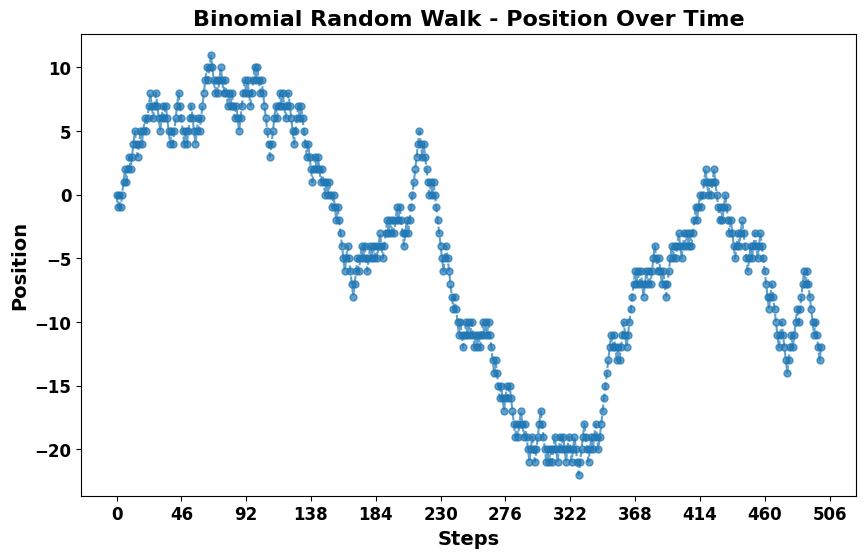

In [ ]:
steps = 500  # Number of steps in the random walk
iterations = 1  # Number of walks

binomial_walks = binomial_random_walk(steps, iterations)

plot_binomial_walks(binomial_walks, pt_size=5)
# pt_size (int or float): The size of the markers in the plot.

### Let us try one more time.

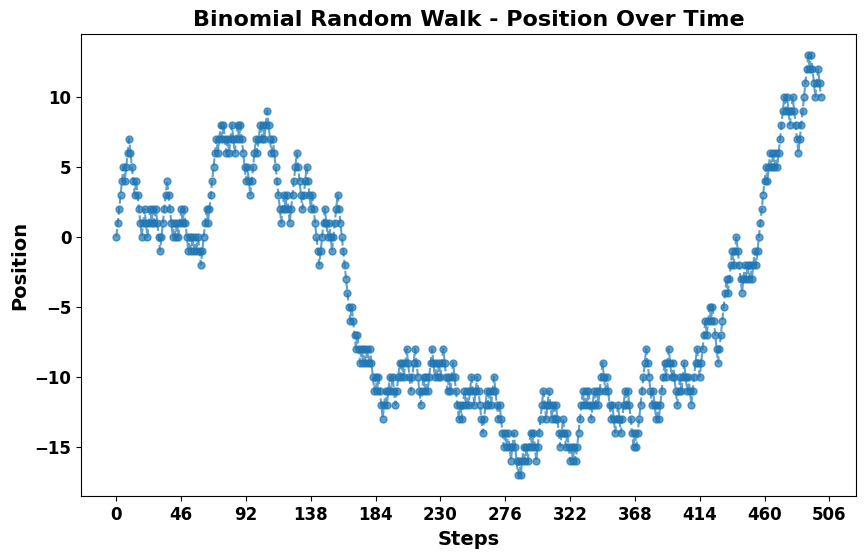

In [ ]:
steps = 500  # Number of steps in the random walk
iterations = 1  # Number of walks

binomial_walks = binomial_random_walk(steps, iterations)

plot_binomial_walks(binomial_walks, pt_size=5)
# pt_size (int or float): The size of the markers in the plot.

*Do we see any difference in the particle prajectories?*


### Let's make it 5 particles and observe the trajectories together.

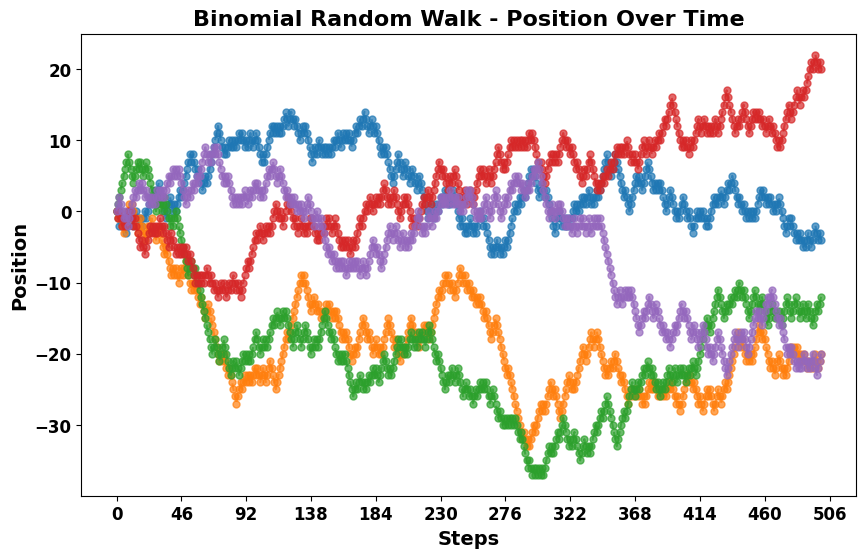

In [ ]:
steps = 500  # Number of steps in the random walk
iterations = 5  # Number of walks

binomial_walks = binomial_random_walk(steps, iterations)

plot_binomial_walks(binomial_walks, pt_size=5)
# pt_size (int or float): The size of the markers in the plot.

### Next 10 particles

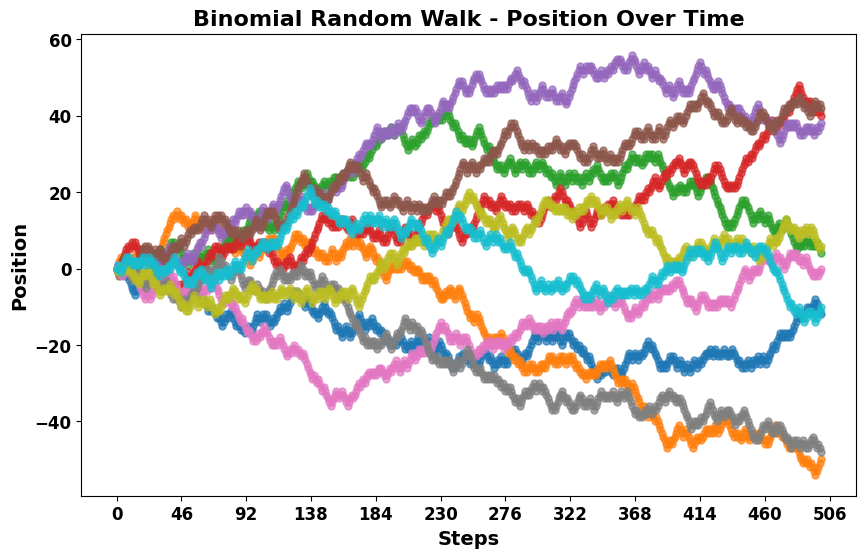

In [ ]:
steps = 500  # Number of steps in the random walk
iterations = 10  # Number of walks

binomial_walks = binomial_random_walk(steps, iterations)

plot_binomial_walks(binomial_walks, pt_size=5)
# pt_size (int or float): The size of the markers in the plot.

### 100 particles!

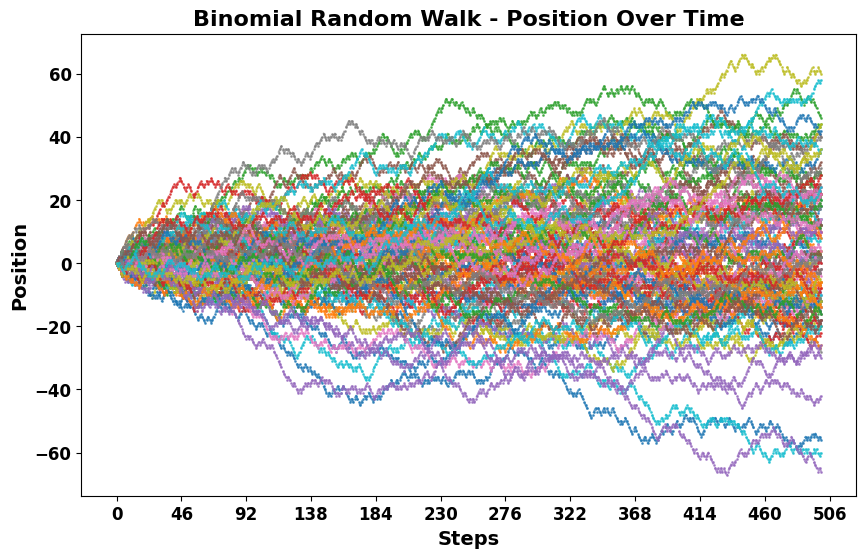

In [ ]:
steps = 500  # Number of steps in the random walk
iterations = 100  # Number of walks

binomial_walks = binomial_random_walk(steps, iterations)

plot_binomial_walks(binomial_walks, pt_size=1)
# pt_size (int or float): The size of the markers in the plot.

### We should observe a broad range of trajectories ending up at a range of positions. The current position of a particle at any point in time, is considered as a **macrostate** irrespective of how it got there. **Microstates** are the individual steps that the particle takes to reach that position.

*Note: Many different sequences of steps (microstates) can result in the particle ending up at the same position (macrostate).*


####**Example**: In 2 steps, a particle can reach the position 2 (starting from zero), by only 1 way.  

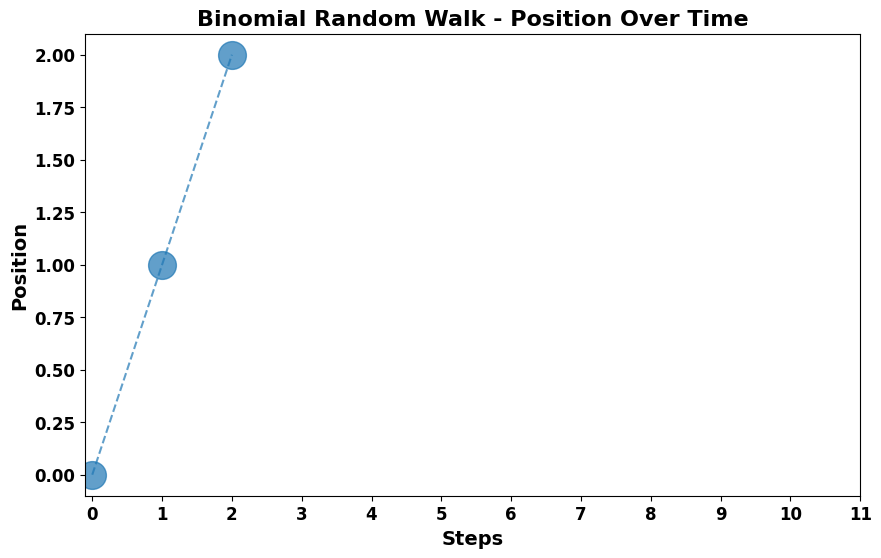

In [ ]:
plot_binomial_walks(np.array([0,1,2]), pt_size=20)

#### But after 2 steps, a particle can still be at position zero (while starting from zero), by 2 different ways.
Way-1:

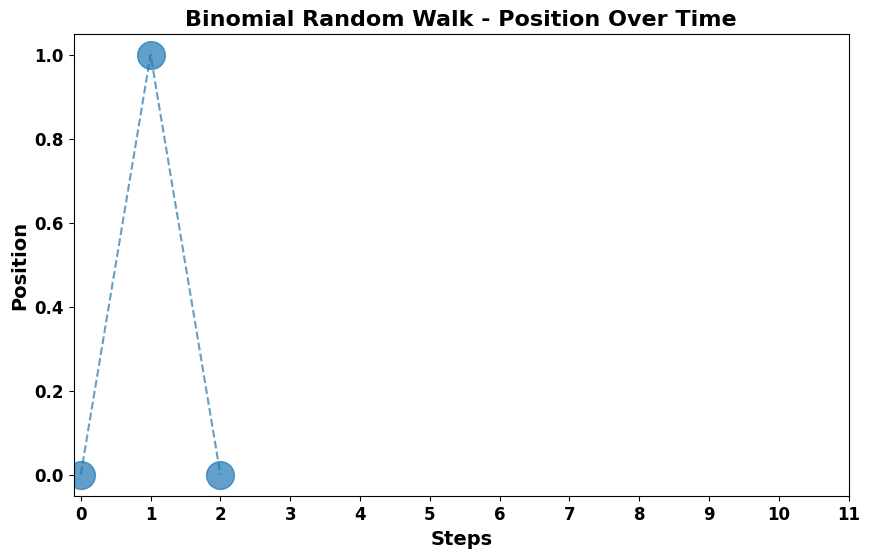

In [ ]:
plot_binomial_walks(np.array([0,1,0]), pt_size=20)

Way-2:

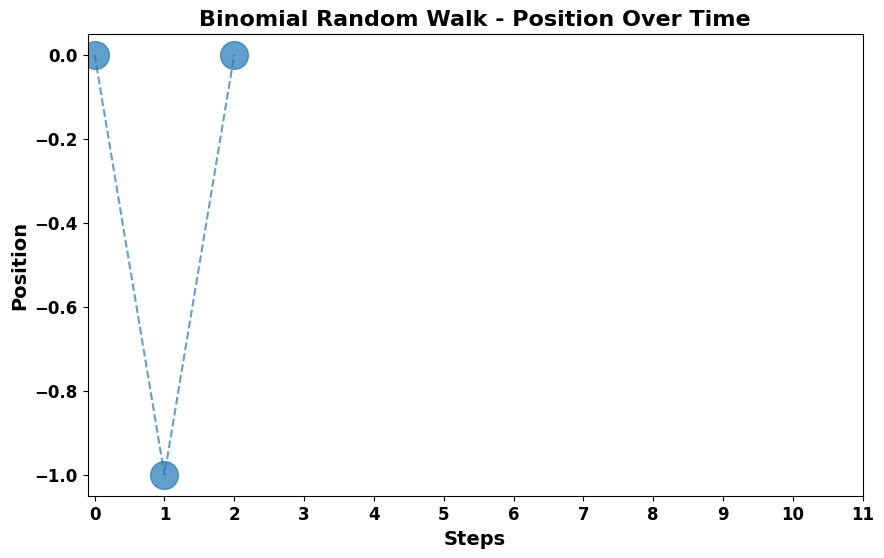

In [ ]:
plot_binomial_walks(np.array([0,-1,0]), pt_size=20)

### These are 2 different **microstates** corresponding to the same **macrostate** of the particle being at position-2.

The number of microstates goes up rapidly as the number of steps (N) increases, since at each instance the particle has two choices of either moving left or right and after N steps, it has made N such choices.

$$\Omega = 2^N$$

While the number of possible macrostates can only go upto (2N+1) i.e. the particle ending up at -N to +N.

### Let us calculate all the possible microstates (corresponding to the macrostates) after 2 steps.

Macrostate (Position) -2: 1 microstates
Macrostate (Position) 0: 2 microstates
Macrostate (Position) 2: 1 microstates


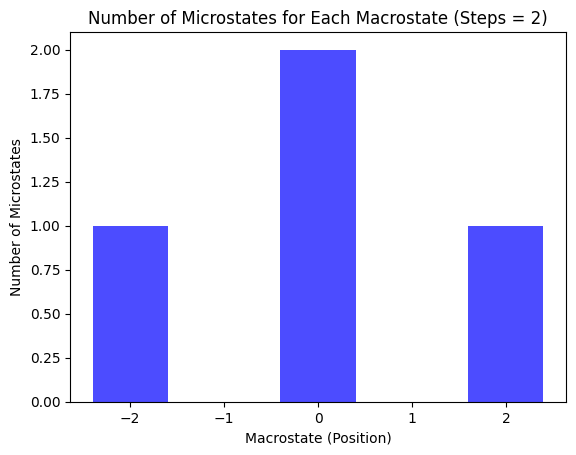

In [ ]:
steps = 2  # Number of steps in the random walk

# Get the macrostates and the corresponding number of microstates
macrostates, microstates = microstates_for_macrostates(steps)

for i in range(len(macrostates)):
    print(f"Macrostate (Position) {macrostates[i]}: {int(microstates[i])} microstates")

plt.bar(macrostates, microstates, color='blue', alpha=0.7)
plt.xlabel('Macrostate (Position)')
plt.ylabel('Number of Microstates')
plt.title(f'Number of Microstates for Each Macrostate (Steps = {steps})')
plt.show()

*We can note that the position-zero has 2 possible microstates, hence the higher likelihood of occuring (more number of ways of reaching that macrostate).*

### Let us go one step further and see the number of microstates for 3 steps.
*Note: It is impossible to end up at an even macrostate position after an uneven number of steps!*

Macrostate (Position) -3: 1 microstates
Macrostate (Position) -1: 3 microstates
Macrostate (Position) 1: 3 microstates
Macrostate (Position) 3: 1 microstates


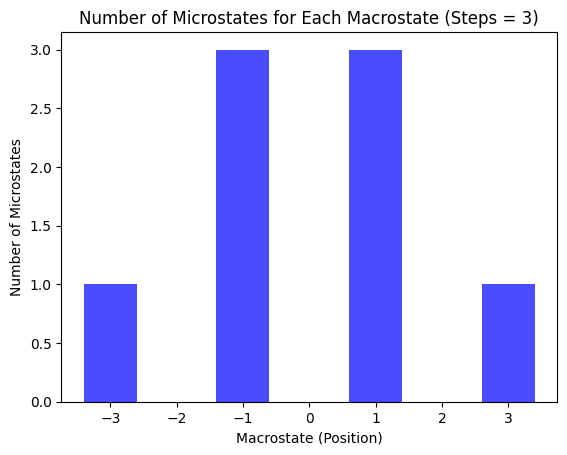

In [ ]:
steps = 3

macrostates, microstates = microstates_for_macrostates(steps)

for i in range(len(macrostates)):
    print(f"Macrostate (Position) {macrostates[i]}: {int(microstates[i])} microstates")

plt.bar(macrostates, microstates, color='blue', alpha=0.7)
plt.xlabel('Macrostate (Position)')
plt.ylabel('Number of Microstates')
plt.title(f'Number of Microstates for Each Macrostate (Steps = {steps})')
plt.show()

### Now let us calculate the number of microstates for 10 steps.

Macrostate (Position) -10: 1 microstates
Macrostate (Position) -8: 10 microstates
Macrostate (Position) -6: 45 microstates
Macrostate (Position) -4: 120 microstates
Macrostate (Position) -2: 210 microstates
Macrostate (Position) 0: 252 microstates
Macrostate (Position) 2: 210 microstates
Macrostate (Position) 4: 120 microstates
Macrostate (Position) 6: 45 microstates
Macrostate (Position) 8: 10 microstates
Macrostate (Position) 10: 1 microstates


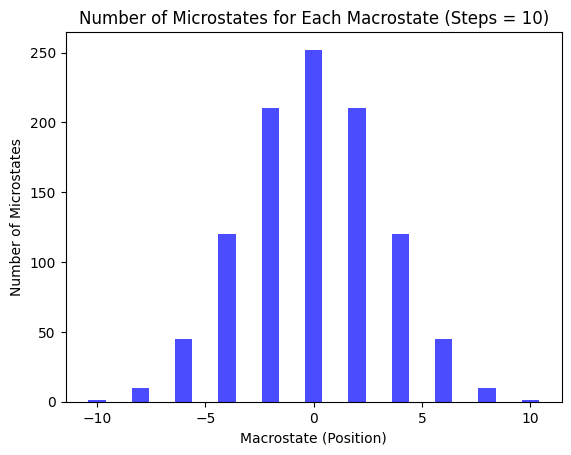

In [ ]:
steps = 10

macrostates, microstates = microstates_for_macrostates(steps)

for i in range(len(macrostates)):
    print(f"Macrostate (Position) {macrostates[i]}: {int(microstates[i])} microstates")

plt.bar(macrostates, microstates, color='blue', alpha=0.7)
plt.xlabel('Macrostate (Position)')
plt.ylabel('Number of Microstates')
plt.title(f'Number of Microstates for Each Macrostate (Steps = {steps})')
plt.show()

### 100 steps!

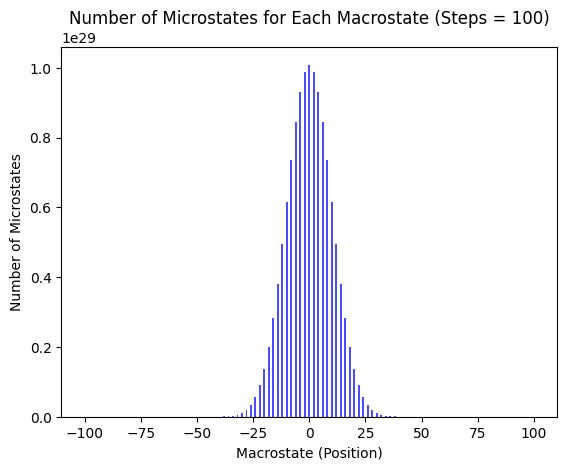

In [ ]:
steps = 100
macrostates, microstates = microstates_for_macrostates(steps)

plt.bar(macrostates, microstates, color='blue', alpha=0.7)
plt.xlabel('Macrostate (Position)')
plt.ylabel('Number of Microstates')
plt.title(f'Number of Microstates for Each Macrostate (Steps = {steps})')
plt.show()

### Finally 500 steps!

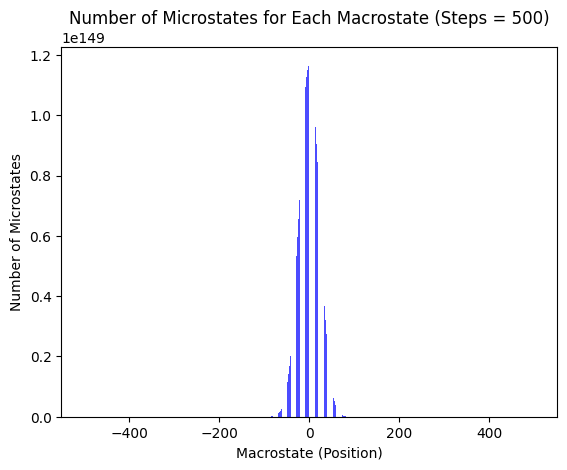

In [ ]:
steps = 500
macrostates, microstates = microstates_for_macrostates(steps)

plt.bar(macrostates, microstates, color='blue', alpha=0.7)
plt.xlabel('Macrostate (Position)')
plt.ylabel('Number of Microstates')
plt.title(f'Number of Microstates for Each Macrostate (Steps = {steps})')
plt.show()

### We note that the number of microstates corresponding to the macrostate of position-zero, is always the highest which means it is always most likely that the particle will stay at the starting location.
Also, with higher number of steps, the number of possible macrostates also increases. Let us put a bound on the range of macrostates to properly see the effects of step size.

In [ ]:
# Create the interactive slider
steps_slider = IntSlider(min=2, max=500, step=1, value=10, description='Steps')
"""
Parameters:
min: Minimum value of the number of steps
max: Maximum value of the number of steps
step: Step-size between successive values of the slider
value: Starting value of the slider
description: Label for the slider
"""

# Display the slider and update the plot based on the value of the slider
interact(update_plot, steps=steps_slider, max_steps=100)
"""
max_steps: Maximum number of steps to display on the x-axis (in one direction).
"""

interactive(children=(IntSlider(value=10, description='Steps', max=500, min=2), IntSlider(value=100, descripti…

'\nmax_steps: Maximum number of steps to display on the x-axis (in one direction).\n'

### Note: The y-axis (number of microstates) explodes as the number of steps increases. Let us divide it by the total number of microstates which will indicate the **probability of finding that specific macrostate**.

In [ ]:
# Create the interactive slider
steps_slider = IntSlider(min=2, max=500, step=1, value=10, description='Steps')
"""
Parameters:
min: Minimum value of the number of steps
max: Maximum value of the number of steps
step: Step-size between successive values of the slider
value: Starting value of the slider
description: Label for the slider
"""

# Display the slider and update the plot based on the value of the slider
interact(update_plot_prob, steps=steps_slider, max_steps=100)
"""
max_steps: Maximum number of steps to display on the x-axis (in one direction).
"""

interactive(children=(IntSlider(value=10, description='Steps', max=500, min=2), IntSlider(value=100, descripti…

'\nmax_steps: Maximum number of steps to display on the x-axis (in one direction).\n'

### We notice that the probability distribution becomes flatter with higher step-size since the particle can now be at more and more end positions (aka macrostates).

### However the peak, though broad and low, is still **centered at zero**.

# How do we connect this to **entropy**?

### Entropy in the context of a 1D random walk measures the uncertainty or randomness associated with the possible outcomes (macrostates) after N steps. One measure of entropy is the **Shannon entropy**:



$$H = -\sum_i p_i \log p_i$$. $$p_i \mbox{is the probability of each macrostate.}$$

### Let us implement the Shannon entropy function on our probability distribution for the number of macrostates.
Note: We should choose the parameter '*max_steps*' value properly. For a much higher step size, the associated probability of finding a particle there might be zero and hence log(p) would be -infinite.  

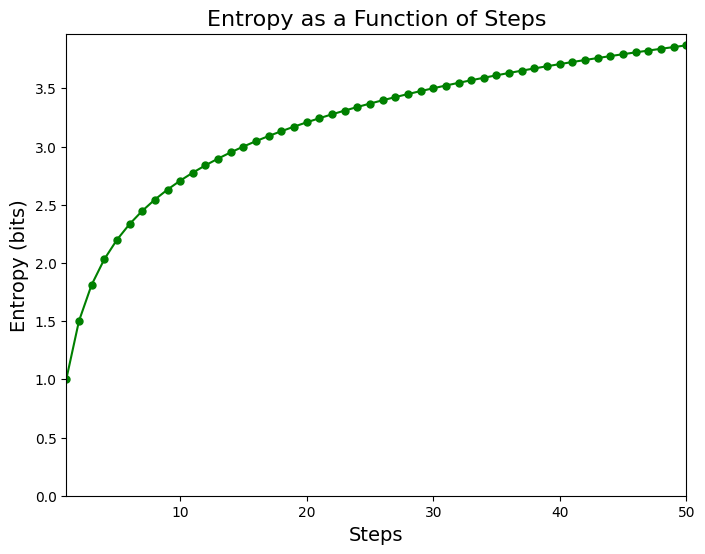

In [ ]:
# Specify the maximum number of steps and call the plotting function
max_steps = 50  # Adjust this number as needed
plot_entropy_vs_steps(max_steps)

### We see that entropy of the system increases with higher number of steps as the particle traverses more and more space!